Business Case Study: Employee Absenteeism
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

The business Task
The exercise will address Absenteeism at a company during work time.

Problem: The problem is that the work environment of today is more:

Competitive
Managers set unachievable business goals
have an elevated risk of becoming unemployed This can be lead to an increase in pressure and stress of the employee. Those factors influence employee health, which is of course indesirable.


What is Absenteeism?
Absence from work during normal working hours resulting in temporary incapacity to execute a regular working activity.

Based on what information should we predict whether an employee is expected to be absent or not?


How should we measure absenteeism?
Purpose of the business exercise:¶

Explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not.

We want to know for how many working hours any employee could be away from work based on information like:

How far they live from their workplace.


How many children and pets they have.
Do they have higher education?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [3]:
data = pd.read_excel('Absenteeism_at_work_Project.xls')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [8]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.00,737.00,739.00,740.00,740.00,733.00,737.00,737.00,737.00,730.00,...,734.00,730.00,734.00,737.00,736.00,738.00,739.00,726.00,709.00,718.00
mean,18.02,19.19,6.32,3.91,2.54,221.04,29.67,12.57,36.45,271188.86,...,0.05,1.30,1.02,0.57,0.07,0.75,79.06,172.15,26.68,6.98
std,11.02,8.44,3.44,1.42,1.11,66.95,14.85,4.39,6.48,38981.88,...,0.22,0.68,1.09,0.50,0.26,1.32,12.87,6.08,4.29,13.48
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205917.00,...,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,9.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244387.00,...,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264249.00,...,0.00,1.00,1.00,1.00,0.00,0.00,83.00,170.00,25.00,3.00
75%,28.00,26.00,9.00,5.00,4.00,260.00,50.00,16.00,40.00,284853.00,...,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378884.00,...,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00


In [9]:
    for column in data.columns:
        print(f"===============Column: {column}==============")
        print(f"Number of unique values: {data[column].nunique()}")
        print(f"Max: {data[column].max()}")
        print(f"Min: {data[column].min()}")

===============Column: ID==============
Number of unique values: 36
Max: 36
Min: 1
===============Column: Reason for absence==============
Number of unique values: 28
Max: 28.0
Min: 0.0
===============Column: Month of absence==============
Number of unique values: 13
Max: 12.0
Min: 0.0
===============Column: Day of the week==============
Number of unique values: 5
Max: 6
Min: 2
===============Column: Seasons==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Transportation expense==============
Number of unique values: 24
Max: 388.0
Min: 118.0
===============Column: Distance from Residence to Work==============
Number of unique values: 25
Max: 52.0
Min: 5.0
===============Column: Service time==============
Number of unique values: 18
Max: 29.0
Min: 1.0
===============Column: Age==============
Number of unique values: 22
Max: 58.0
Min: 27.0
===============Column: Work load Average/day ==============
Number of unique values: 38
Max: 378884.0
Min: 205917.0
=====

In [10]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [12]:
data.ID.value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

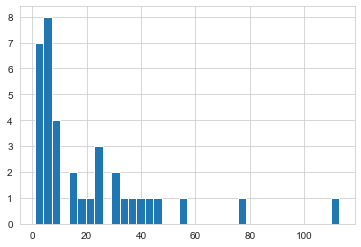

In [13]:
data.ID.value_counts().hist(bins=data.ID.nunique())

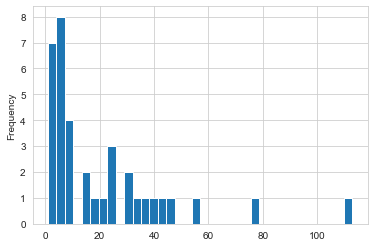

In [14]:
data.ID.value_counts().plot.hist(bins=data.ID.nunique())

In [15]:
data.drop('ID', axis=1, inplace=True)

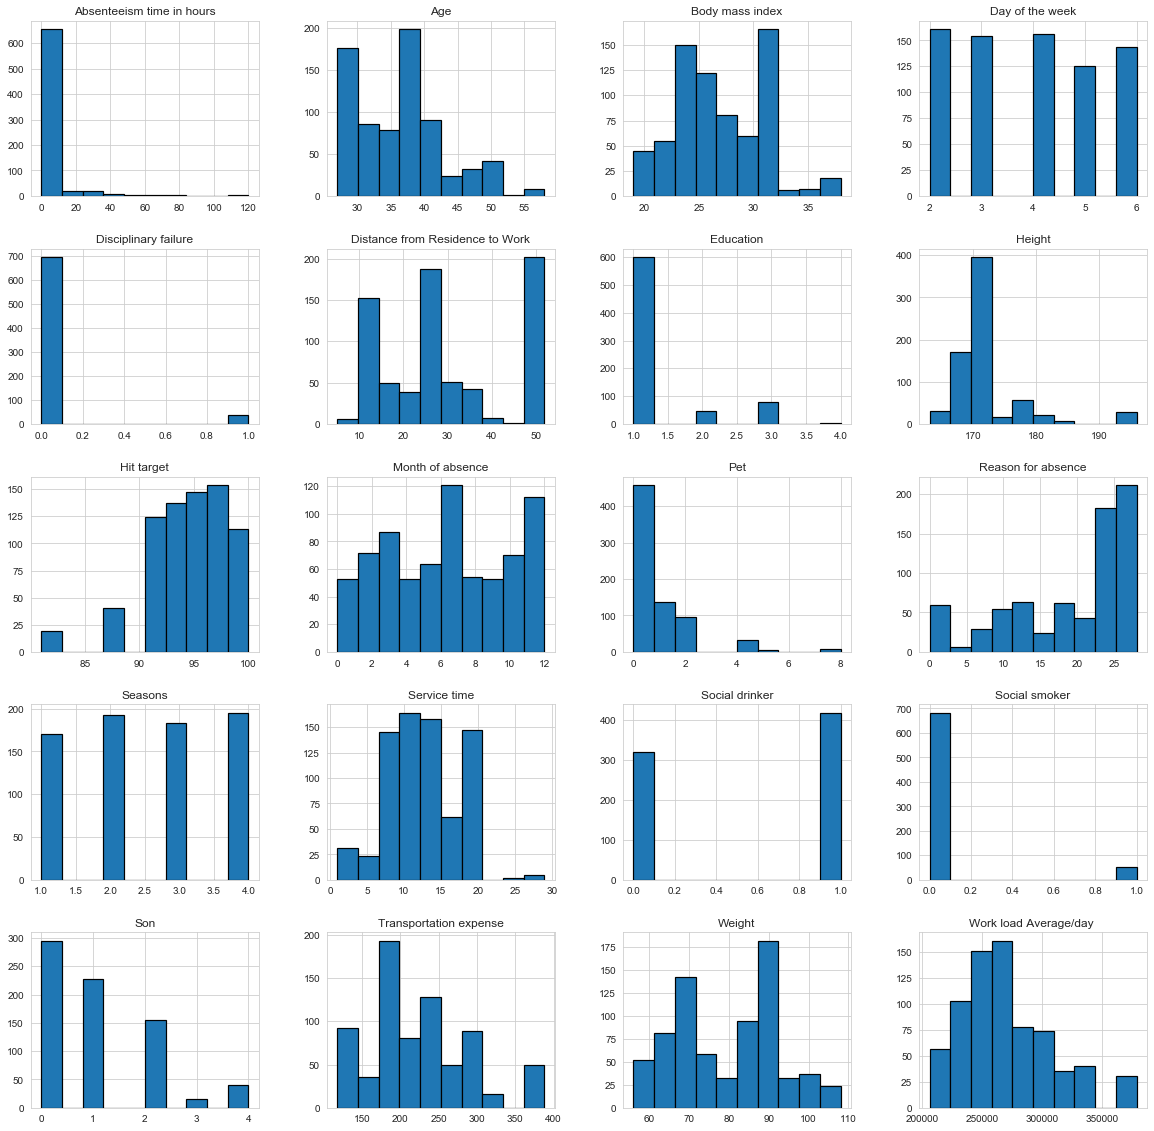

In [16]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [17]:
print(f"{data['Absenteeism time in hours'].value_counts()}")
print(f"{data['Absenteeism time in hours'].value_counts()[0] / data['Absenteeism time in hours'].value_counts()[1]}")

8.00      199
2.00      155
3.00      110
1.00       88
4.00       60
0.00       36
16.00      19
24.00      16
40.00       7
5.00        7
32.00       5
64.00       3
80.00       3
120.00      3
56.00       2
112.00      2
104.00      1
7.00        1
48.00       1
Name: Absenteeism time in hours, dtype: int64
0.4090909090909091


In [18]:
data["Reason for absence"].value_counts()

23.00    149
28.00    110
27.00     69
13.00     55
0.00      43
19.00     40
22.00     37
26.00     33
25.00     31
11.00     26
10.00     25
18.00     21
14.00     19
1.00      16
7.00      15
6.00       8
12.00      8
8.00       6
21.00      6
9.00       4
24.00      3
5.00       3
16.00      3
15.00      2
4.00       2
2.00       1
17.00      1
3.00       1
Name: Reason for absence, dtype: int64

In [21]:
reason_dic = {0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1", 
                                                             4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1", 
                                                             8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1", 
                                                             12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2", 
                                                             16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3", 
                                                             19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4", 
                                                             23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4", 
                                                             27: "Group_4", 28: "Group_4"}


print(reason_dic)

{0: 'Group_1', 1: 'Group_1', 2: 'Group_1', 3: 'Group_1', 4: 'Group_1', 5: 'Group_1', 6: 'Group_1', 7: 'Group_1', 8: 'Group_1', 9: 'Group_1', 10: 'Group_1', 11: 'Group_1', 12: 'Group_1', 13: 'Group_1', 14: 'Group_1', 15: 'Group_2', 16: 'Group_2', 17: 'Group_2', 18: 'Group_3', 19: 'Group_3', 20: 'Group_3', 21: 'Group_3', 22: 'Group_4', 23: 'Group_4', 24: 'Group_4', 25: 'Group_4', 26: 'Group_4', 27: 'Group_4', 28: 'Group_4'}


In [22]:
data["Reason for absence"].map(reason_dic)

0      Group_4
1      Group_1
2      Group_4
3      Group_1
4      Group_4
        ...   
735    Group_1
736    Group_1
737    Group_1
738    Group_1
739    Group_1
Name: Reason for absence, Length: 740, dtype: object

In [23]:
data["Reason for absence"] = data["Reason for absence"].map(reason_dic)
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason for absence"].value_counts()

Group_4    432
Group_1    232
Group_3     67
Group_2      6
Name: Reason for absence, dtype: int64

In [24]:
data_1 = pd.get_dummies(data, columns=['Reason for absence'])

In [25]:
data_1.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason for absence_Group_1,Reason for absence_Group_2,Reason for absence_Group_3,Reason for absence_Group_4
0,7.00,3,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,0.00,1.00,90.00,172.00,30.00,4.00,0,0,0,1
1,7.00,3,1,118.00,13.00,18.00,50.00,239554.00,97.00,1.00,...,0.00,0.00,98.00,178.00,31.00,0.00,1,0,0,0
2,7.00,4,1,179.00,51.00,18.00,38.00,239554.00,97.00,0.00,...,0.00,0.00,89.00,170.00,31.00,2.00,0,0,0,1
3,7.00,5,1,279.00,5.00,14.00,39.00,239554.00,97.00,0.00,...,1.00,0.00,68.00,168.00,24.00,4.00,1,0,0,0
4,7.00,5,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,0.00,1.00,90.00,172.00,30.00,2.00,0,0,0,1


In [26]:
data_1.dtypes

Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
Reason for absence_Group_1           uint8
Reason for absence_Group_2           uint8
Reason for absence_Group_3           uint8
Reason for absence_Group_4           uint8
dtype: obje

In [45]:
data_1.dropna(inplace=True)
data_1.isna().sum()

Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
Reason for absence_Group_1         0
Reason for absence_Group_2         0
Reason for absence_Group_3         0
Reason for absence_Group_4         0
dtype: int64

In [46]:
data_1.Education.value_counts()

0.00    525
1.00    117
Name: Education, dtype: int64

In [47]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})


In [48]:
data_1.Education.value_counts()

0.00    117
Name: Education, dtype: int64

In [49]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours',
       'Reason for absence_Group_1', 'Reason for absence_Group_2',
       'Reason for absence_Group_3', 'Reason for absence_Group_4'],
      dtype='object')

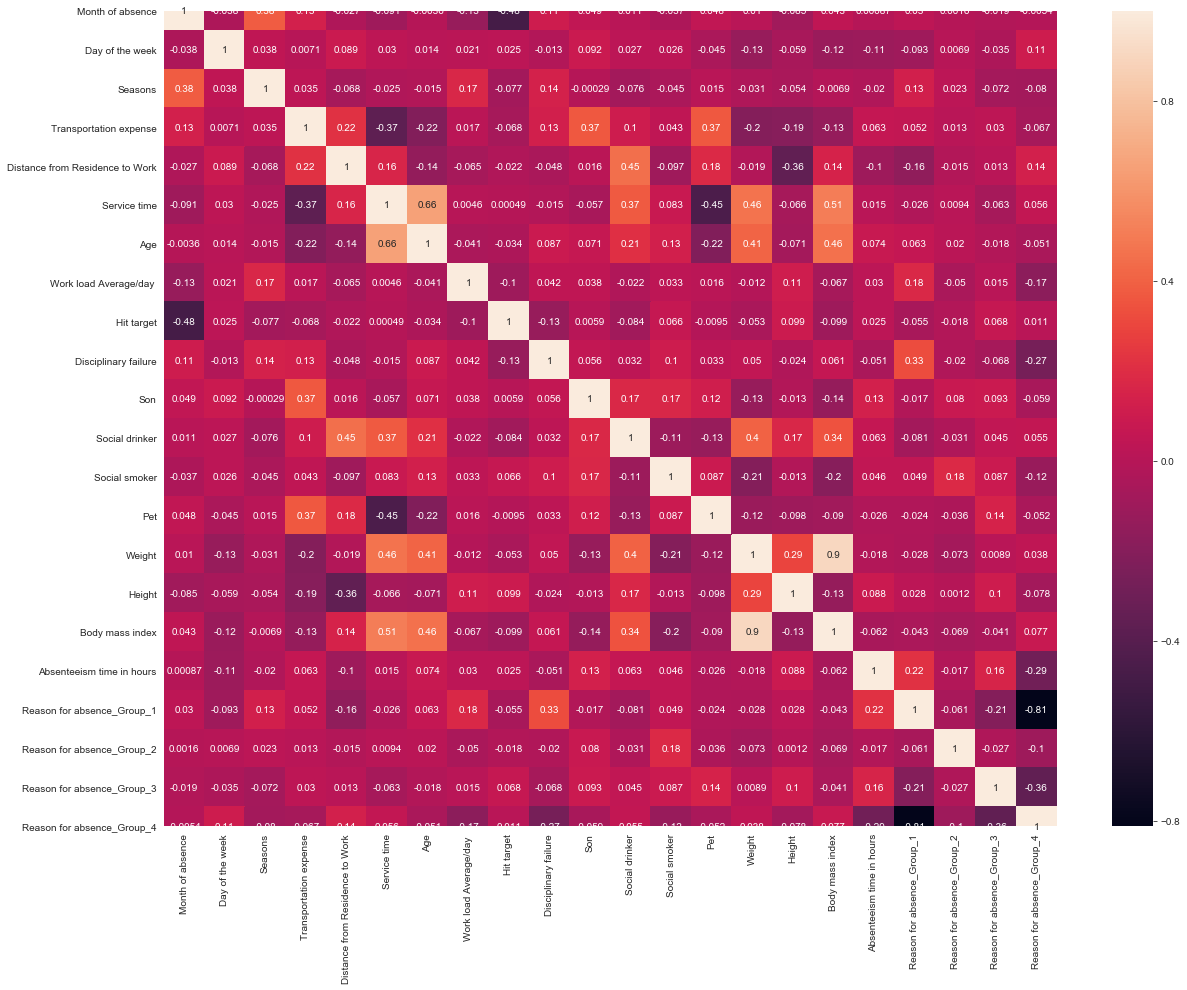

In [50]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_2.corr(), annot=True)

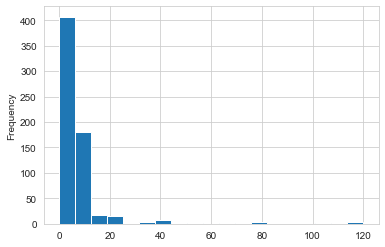

In [51]:
# data_2['Absenteeism time in hours'].hist(bins=data_2['Absenteeism time in hours'].nunique())

#or

data_2['Absenteeism time in hours'].plot.hist(bins=data_2['Absenteeism time in hours'].nunique())

In [52]:
data_1.isna().sum()

Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               0
Distance from Residence to Work      0
Service time                         0
Age                                  0
Work load Average/day                0
Hit target                           0
Disciplinary failure                 0
Education                          525
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                               0
Body mass index                      0
Absenteeism time in hours            0
Reason for absence_Group_1           0
Reason for absence_Group_2           0
Reason for absence_Group_3           0
Reason for absence_Group_4           0
dtype: int64

In [53]:
# data_2.drop(["Distance to Work", "Month of absence", "Weekday", "Age", "Daily Work Load Average"], axis=1, inplace=True)

In [54]:
data_2.head(2)

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason for absence_Group_1,Reason for absence_Group_2,Reason for absence_Group_3,Reason for absence_Group_4
0,7.00,3,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,...,0.00,1.00,90.00,172.00,30.00,4.00,0,0,0,1
1,7.00,3,1,118.00,13.00,18.00,50.00,239554.00,97.00,1.00,...,0.00,0.00,98.00,178.00,31.00,0.00,1,0,0,0


In [55]:
X = data_2.drop('Absenteeism time in hours', axis=1)
y = np.where(data_2["Absenteeism time in hours"] > data_2["Absenteeism time in hours"].median(), 1, 0)

print(X.shape)
print(y.shape)

(642, 21)
(642,)


In [56]:
y.sum() / y.shape[0]

0.45638629283489096

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

model = LogisticRegression(solver="liblinear")

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=20)


# print(y_train)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

def accuracy_report(y_test, y_test_pred, sample="Test"):
    print(f"========={sample} data============ :\n=>Accuracy Score {accuracy_score(y_test, y_test_pred)}")
    print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")

In [61]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.7582846003898636
=>Confusion Matrix :
[[219  60]
 [ 64 170]]


In [62]:
accuracy_report(y_test, y_test_pred, "Test")

=========Test data============ :
=>Accuracy Score 0.7751937984496124
=>Confusion Matrix :
[[57 13]
 [16 43]]


In [63]:
model.score(X_train, y_train)

0.7582846003898636

In [64]:
scores = cross_val_score(model, X_std, y, cv=10)
scores.mean()

0.7006249999999999

In [65]:
model.intercept_

array([-0.22286639])

In [66]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
feature_name = X.columns
summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(model.coef_)
summary_table

,Features_name,Coefficients
0,Month of absence,0.14
1,Day of the week,-0.29
2,Seasons,-0.19
3,Transportation expense,0.60
4,Distance from Residence to Work,-0.20
5,Service time,-0.15
6,Age,-0.16
7,Work load Average/day,0.09
8,Hit target,-0.07
9,Disciplinary failure,-1.07


In [68]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table.sort_index(inplace=True)

In [69]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values(by="Odds_ratio", ascending=False)

,Features_name,Coefficients,Odds_ratio
4,Transportation expense,0.60,1.82
18,Reason for absence_Group_1,0.59,1.80
20,Reason for absence_Group_3,0.51,1.66
11,Son,0.47,1.60
15,Weight,0.46,1.59
12,Social drinker,0.30,1.35
1,Month of absence,0.14,1.15
8,Work load Average/day,0.09,1.09
13,Social smoker,0.04,1.04
19,Reason for absence_Group_2,0.02,1.02


In [70]:
# Random Forest¶
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

random_forest_grid = GridSearchCV(rf_model, param_grid, scoring="accuracy", 
                                  n_jobs=-1, verbose=1, cv=3, iid=True)

random_forest_grid.fit(X_train, y_train)

y_train_pred = random_forest_grid.predict(X_train)
y_test_pred = random_forest_grid.predict(X_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    7.4s finished
C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [71]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.7829457364341085
=>Confusion Matrix :
[[59 11]
 [17 42]]


In [72]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.8791423001949318
=>Confusion Matrix :
[[252  27]
 [ 35 199]]


In [73]:
# Gradient Boosting Classifier¶


from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

gbm_model.fit(X_train, y_train)

y_train_pred = gbm_model.predict(X_train)
y_test_pred = gbm_model.predict(X_test)

In [74]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.7674418604651163
=>Confusion Matrix :
[[58 12]
 [18 41]]


In [75]:
accuracy_report(y_train, y_train_pred, "Train")


=========Train data============ :
=>Accuracy Score 0.8869395711500975
=>Confusion Matrix :
[[254  25]
 [ 33 201]]


In [76]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,
                       'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
                       'booster' : booster, 'base_score' : base_score
                      }

xgb_model = xgb.XGBClassifier()

xgb_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=hyperparameter_grid,
                               cv=5, n_iter=50, scoring = 'accuracy',n_jobs =-1, iid=True,
                               verbose = 5, return_train_score = True, random_state=42)


xgb_cv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.3s finished
C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid=True, n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 0.99],
                                        'booste

In [77]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
xgb_best = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                         colsample_bynode=1, colsample_bytree=1, gamma=0,
                         learning_rate=0.1, max_delta_step=0, max_depth=2,
                         min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                         nthread=None, objective='binary:logistic', random_state=0,
                         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                         silent=None, subsample=1, verbosity=1)

In [79]:
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [80]:
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

In [81]:
accuracy_report(y_test, y_test_pred)

=========Test data============ :
=>Accuracy Score 0.7829457364341085
=>Confusion Matrix :
[[57 13]
 [15 44]]


In [82]:
accuracy_report(y_train, y_train_pred, "Train")

=========Train data============ :
=>Accuracy Score 0.8050682261208577
=>Confusion Matrix :
[[228  51]
 [ 49 185]]


In [83]:
# Save the model
import pickle

with open('model', 'wb') as file:
    pickle.dump(xgb_best, file)